In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

from datetime import datetime

In [4]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN' , 'INFY']


tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN' , 'INFY']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN , INFY]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON" ,"INFOSYS"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-10-24,16.670000,16.820000,16.650000,16.780001,16.780001,5602500,INFOSYS
2023-10-25,16.459999,16.530001,16.370001,16.379999,16.379999,4727100,INFOSYS
2023-10-26,16.389999,16.469999,16.270000,16.320000,16.320000,6991300,INFOSYS
2023-10-27,16.510000,16.610001,16.400000,16.440001,16.440001,5591700,INFOSYS
2023-10-30,16.500000,16.559999,16.389999,16.500000,16.500000,5559700,INFOSYS
2023-10-31,16.410000,16.510000,16.320000,16.420000,16.420000,4663500,INFOSYS
2023-11-01,16.299999,16.410000,16.270000,16.400000,16.400000,5943300,INFOSYS
2023-11-02,16.620001,16.740000,16.549999,16.690001,16.690001,9262500,INFOSYS
2023-11-03,16.799999,16.850000,16.670000,16.680000,16.680000,8673700,INFOSYS


In [5]:
INFY.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,17.260916,17.396175,17.143745,17.273904,16.929290,8.867639e+06
std,1.353845,1.368730,1.342435,1.352531,1.284610,4.867993e+06
min,14.820000,14.860000,14.710000,14.790000,14.404773,2.744300e+06
25%,16.245000,16.355000,16.139999,16.250000,16.040822,5.891150e+06
50%,17.209999,17.370001,17.090000,17.270000,16.919365,7.522300e+06
75%,18.160000,18.275001,18.045000,18.175000,17.750303,1.043685e+07
max,20.400000,20.570000,20.250000,20.510000,19.975786,4.041500e+07


In [6]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-11-07 to 2023-11-06
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


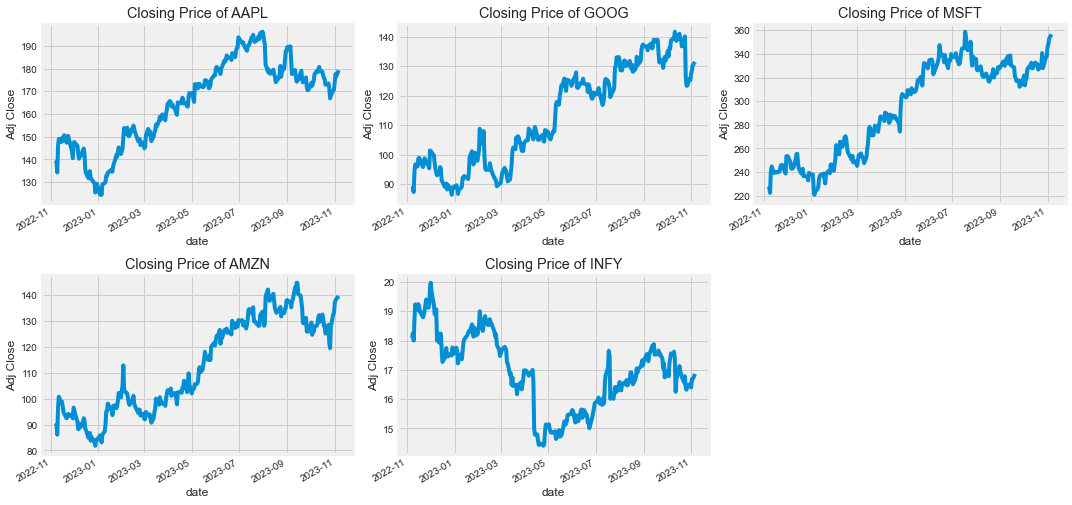

In [7]:
#historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 3, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel('date')
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

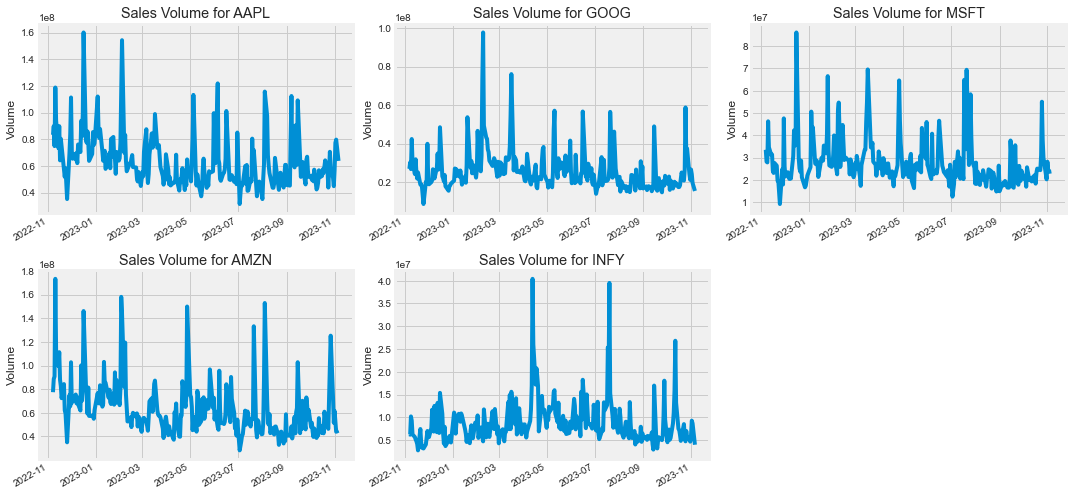

In [8]:
#plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 3, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()


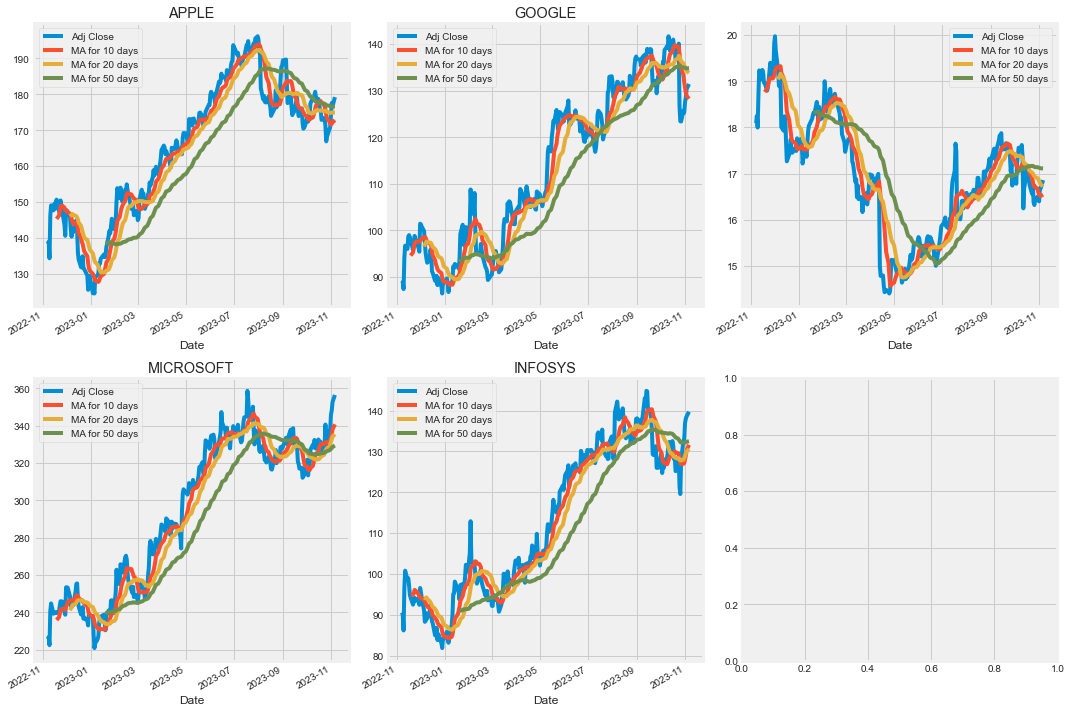

In [34]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=3)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

INFY[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,2])
axes[1,1].set_title('INFOSYS')

fig.tight_layout()


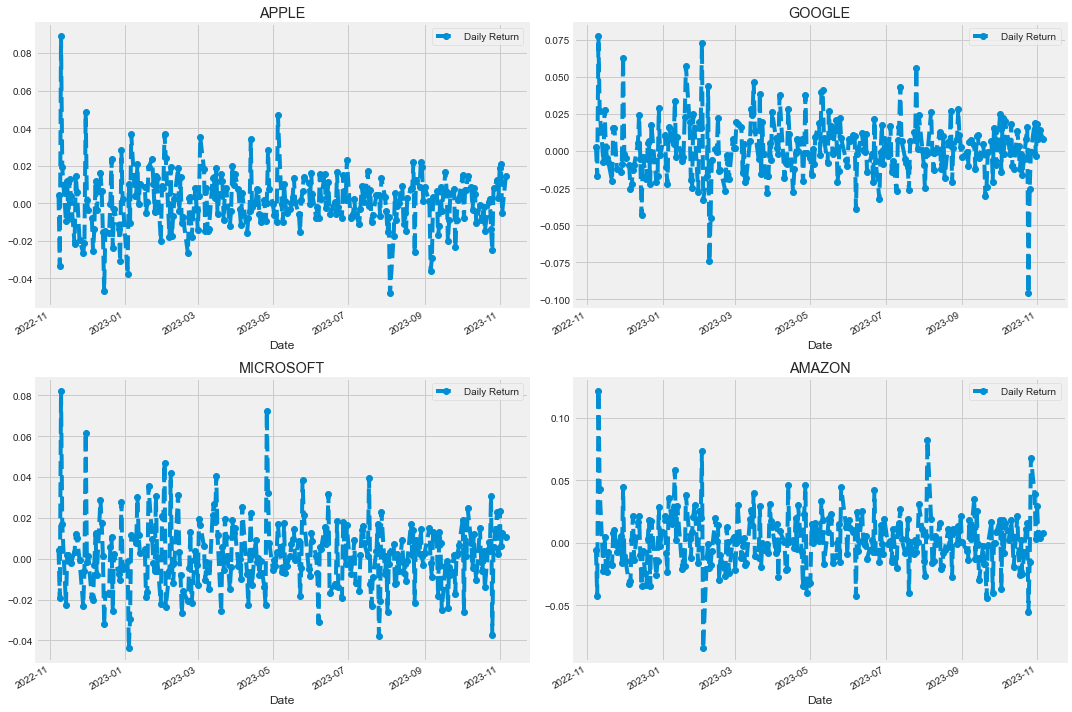

In [35]:
#use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

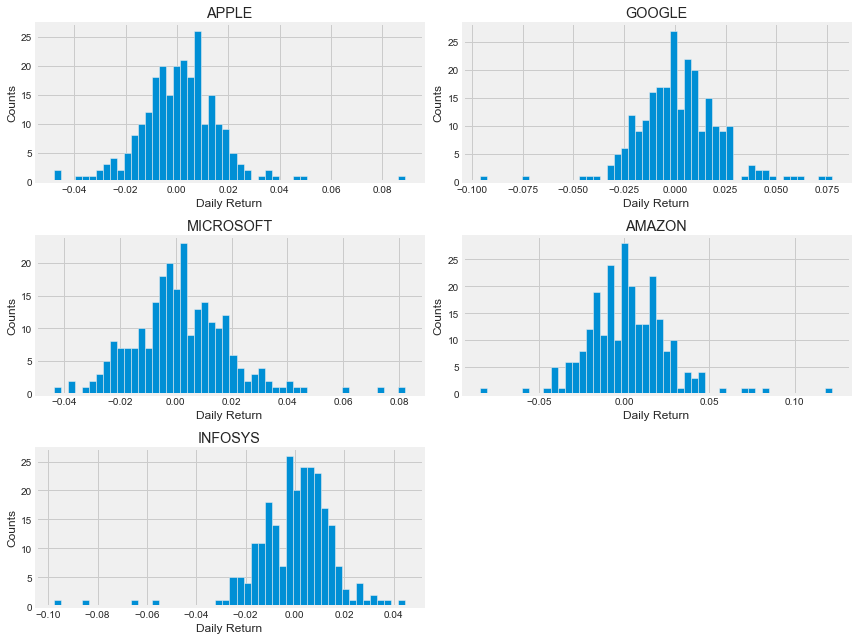

In [36]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

In [37]:
closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

#new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  5 of 5 completed


,AAPL,AMZN,GOOG,INFY,MSFT
Date,,,,,
2022-11-07,NaN,NaN,NaN,NaN,NaN
2022-11-08,0.004175,-0.006075,0.002933,0.008611,0.004388
2022-11-09,-0.033190,-0.042676,-0.016983,-0.013874,-0.019050
2022-11-10,0.088975,0.121778,0.077460,0.038961,0.082268
2022-11-11,0.019269,0.043051,0.027185,0.028646,0.016997


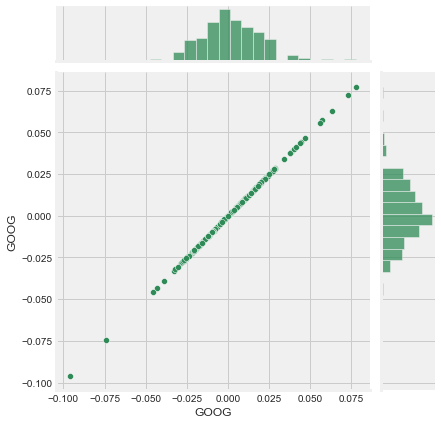

In [38]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

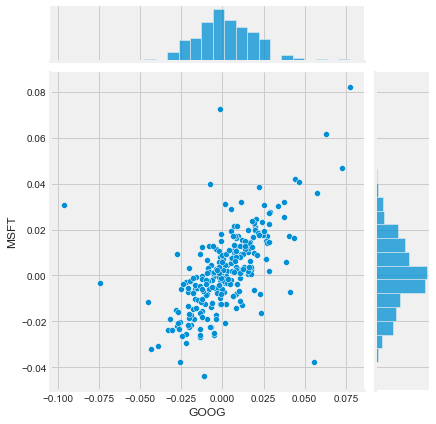

In [39]:
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

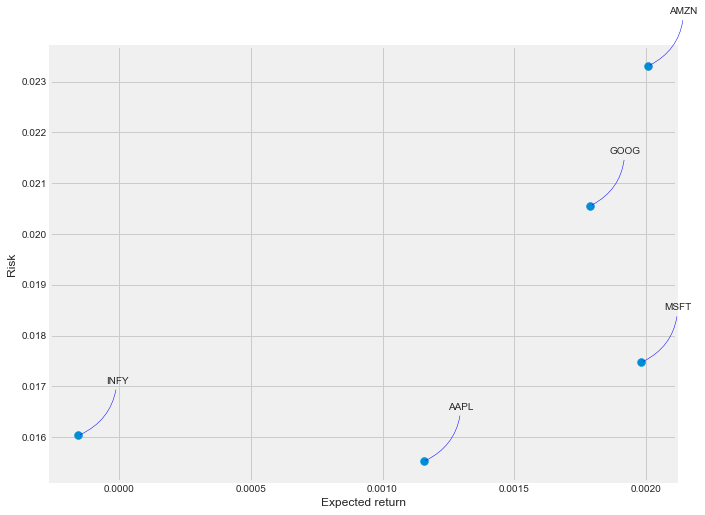

In [40]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))


In [41]:
df = pdr.get_data_yahoo('INFY', start='2012-01-01', end=datetime.now())

df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,6.706250,6.805000,6.662500,6.681250,4.987727,14123200
2012-01-04,6.700000,6.757500,6.638750,6.650000,4.964396,9913600
2012-01-05,6.651250,6.793750,6.640000,6.751250,5.039982,12347200
2012-01-06,6.726250,6.750000,6.640000,6.740000,5.031585,10824000
2012-01-09,6.771250,6.932500,6.752500,6.917500,5.164092,16880000
...,...,...,...,...,...,...
2023-10-31,16.410000,16.510000,16.320000,16.420000,16.420000,4663500
2023-11-01,16.299999,16.410000,16.270000,16.400000,16.400000,5943300
2023-11-02,16.620001,16.740000,16.549999,16.690001,16.690001,9262500


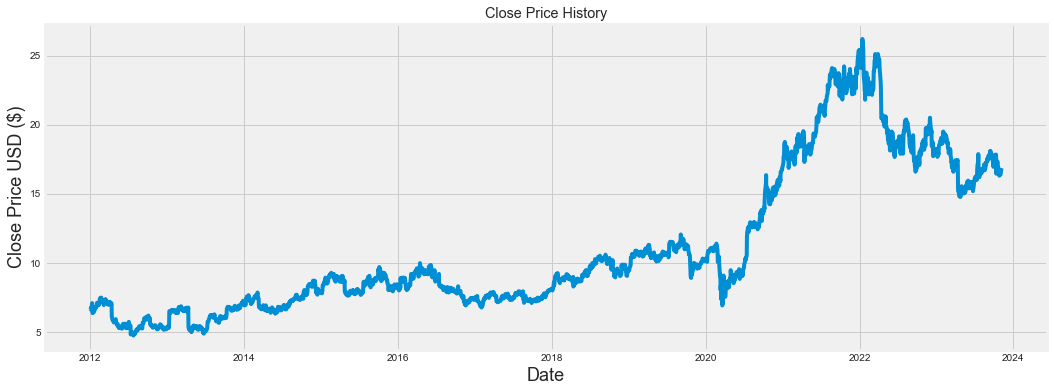

In [42]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [9]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .95))

training_data_len

1193

In [44]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.0891326 ],
       [0.08767428],
       [0.09239923],
       ...,
       [0.55620371],
       [0.55573703],
       [0.56413698]])

In [45]:

train_data = scaled_data[0:int(training_data_len), :]


x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
 
x_train, y_train = np.array(x_train), np.array(y_train)


x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape


[array([0.0891326 , 0.08767428, 0.09239923, 0.09187423, 0.10015751,
       0.1035408 , 0.10908242, 0.07979933, 0.07530772, 0.08020766,
       0.07950767, 0.07892435, 0.08236599, 0.0853993 , 0.08994926,
       0.09362423, 0.09718254, 0.09414923, 0.09403256, 0.09811586,
       0.10091584, 0.10109083, 0.11036575, 0.10593247, 0.1040658 ,
       0.10243248, 0.10575745, 0.10231581, 0.10418246, 0.11118241,
       0.12028234, 0.12389897, 0.12500729, 0.1246573 , 0.12792393,
       0.12529897, 0.1251823 , 0.11987401, 0.11864901, 0.11380739,
       0.11497405, 0.11386572, 0.11030743, 0.10260747, 0.11019076,
       0.11404073, 0.1168407 , 0.1132824 , 0.12121567, 0.11981567,
       0.12185733, 0.12016567, 0.11625736, 0.1136324 , 0.1141574 ,
       0.10674912, 0.11001575, 0.1122324 , 0.11316573, 0.10348248])]
[0.1066907779792444]

[array([0.0891326 , 0.08767428, 0.09239923, 0.09187423, 0.10015751,
       0.1035408 , 0.10908242, 0.07979933, 0.07530772, 0.08020766,
       0.07950767, 0.07892435, 0.082

(2772, 60, 1)

In [46]:
from keras.models import Sequential
from keras.layers import Dense, LSTM


model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


model.compile(optimizer='adam', loss='mean_squared_error')


model.fit(x_train, y_train, batch_size=1, epochs=1)

2772/2772 [==============================] - 117s 40ms/step - loss: 0.0012


In [47]:

test_data = scaled_data[training_data_len - 60: , :]

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    

x_test = np.array(x_test)


x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))


predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

5/5 [==============================] - 1s 42ms/step


C:\Users\chiru c\AppData\Local\Temp\ipykernel_16208\2728537308.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


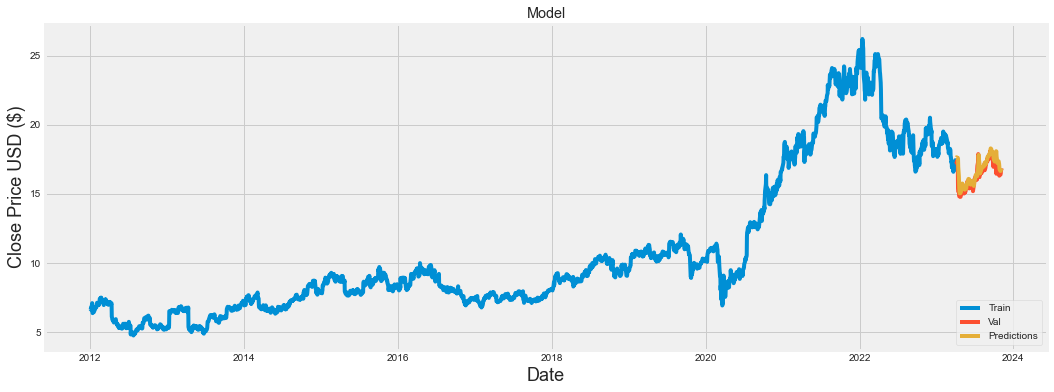

In [48]:

train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions


plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [49]:
valid
valid.tail(5)

,Close,Predictions
Date,,
2023-10-31,16.420000,16.660362
2023-11-01,16.400000,16.661770
2023-11-02,16.690001,16.669392
2023-11-03,16.680000,16.757408
2023-11-06,16.860001,16.851549


In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,mean_absolute_percentage_error

# Calculate the predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


mape=mean_absolute_percentage_error(y_test,predictions)
print(f'Mean Absolute % Error (MAE): {mape}')


# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(np.mean((predictions-y_test)**2))
print(f'Root Mean Squared Error (RMSE): {rmse}')


5/5 [==============================] - 0s 38ms/step
Mean Absolute % Error (MAE): 0.019315766140988632
Root Mean Squared Error (RMSE): 0.45544653767845744
